### Importing libraries

In [51]:
# test test
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import tree, ensemble
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet, HuberRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel, RBF

from sklearn import svm
from sklearn.svm import SVC
# from sklearn.metrics import mean_absolute_percentage_error

In [52]:
pwd

'C:\\Users\\obensalem\\algo\\Run'

### Get data

In [53]:

#df = pd.read_csv("Data.csv", encoding='latin-1',sep=';')
#df.head()

In [54]:
df = pd.read_excel("Data.xlsx", sheet_name='Data2')
df.head()

,Angebots-Nr.,Datum,Kunde,Artikel /Artikel-Nr.,Produktgruppe,Lieferant,Material,Material_2.0,Farbe,Laenge,...,Materialausgangsstaerke,Menge,Stueckpreis,Werkzeugkosten,Materialpreis,Lieferantpreis,Dichte,Volum_cm3,Gewicht,M_produktpreis
0,176.0,2022-04-21 00:00:00,Capt´n Greenfin,NaN,NaN,schick,pet,A-PET,transparent,120.0,...,0.8,0.0,0.0,5510.0,1850.0,0.0,1.34,9.600,12.8640,0.023798
1,177.0,2022-04-21 00:00:00,Capt´n Greenfin,NaN,NaN,schick,pet,A-PET,transparent,120.0,...,0.8,0.0,0.0,5510.0,1850.0,0.0,1.34,9.600,12.8640,0.023798
2,178.0,2022-04-21 00:00:00,Capt´n Greenfin,NaN,NaN,schick,pet,A-PET,transparent,120.0,...,0.8,0.0,0.0,5510.0,1850.0,0.0,1.34,9.600,12.8640,0.023798
3,193.0,2022-05-23 00:00:00,Cleansign,NaN,NaN,schmutz + Sohn,pc,PC,transparent,352.0,...,2.0,0.0,0.0,5600.0,4700.0,0.0,1.20,177.408,212.8896,1.000581
4,194.0,2022-05-23 00:00:00,Cleansign,NaN,NaN,schmutz + Sohn,pc,PC,transparent,352.0,...,2.0,0.0,0.0,5600.0,4700.0,0.0,1.20,177.408,212.8896,1.000581


In [55]:
df.shape

(1048575, 22)

### Data Preprocessing

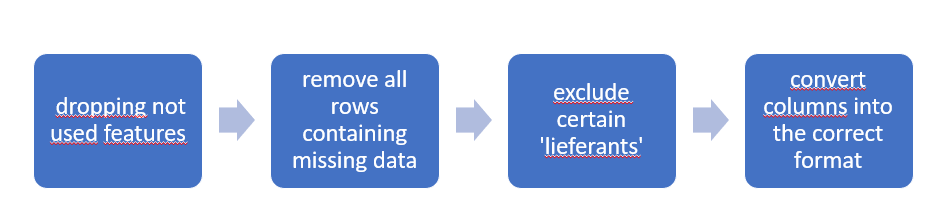

### Data analysis

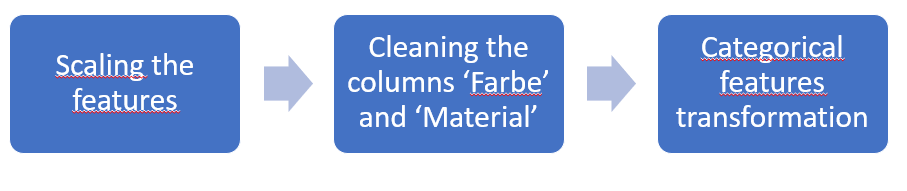

In [57]:
# keep a backup of the dataframe
df_backup = df.copy()

# choose into dummies transformation for the categ features
dummies_encoder = True
scaling_features = True

# 1. scaling the features (X = X_train + X_test)
if scaling_features:
    scaler = StandardScaler()
    scaler = scaler.fit(df.loc[:, numeric_features])
    df.loc[:, numeric_features] = scaler.transform(df.loc[:, numeric_features])

# 2. Doing some preprocessing steps before the encoding
# passing the col Farbe into lower case
df.Farbe = df.Farbe.str.lower()
df['Farbe']= df['Farbe'].str.rstrip() #.replace({"schwarz ": "schwarz"})

# passing the col Material into lower case
df.Material = df.Material.str.lower()
df['Material']= df['Material'].str.rstrip() # retieve spaces from words in the column Material

# 3. Categorical features transformation
if dummies_encoder:
    # Dummies Transformation of the columns: Lieferant, Material and Farbe
    cols_into_dummies = pd.concat([pd.get_dummies(df.Material),
                                   pd.get_dummies(df.Farbe),
                                   pd.get_dummies(df.Lieferant)], axis=1)
    # dropping the useless original features
    df = df.drop(columns=['Lieferant', 'Material', 'Farbe'])

    # concatenate the encoded vars with the previous dataframe
    df = pd.concat([cols_into_dummies, df], axis=1)
else:
    # ordinal encoder for the columns: Lieferant, Material and Farbe
    encoder = OrdinalEncoder()
    encoder = encoder.fit(df.loc[:, categorical_features])
    df.loc[:, categorical_features] = encoder.transform(df.loc[:, categorical_features])
    
df.head()

,abs,abs re,pc,pc re,pe,pe re,pet,pet re,pmma,pp,...,jaun,kroh,schick,schmutz + Sohn,Laenge,Breite,Materialausgangsstaerke,Menge,Materialpreis,Lieferantpreis
62,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-1.179560,-1.135384,-1.071080,0.945372,-0.833958,0.01600
63,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-1.365894,-1.446025,-1.071080,5.161380,-0.762071,0.02100
64,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,-1.132187,-1.056407,-1.071080,18.336405,-0.738108,0.02152
65,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,-1.365894,-1.446025,-1.071080,2.526375,-0.762071,0.02200
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.311058,-0.213991,-0.693744,-0.107839,-0.512861,0.02203


### Splitting Features (X) and Target (y)

In [58]:
target_col = ['Lieferantpreis']
features_cols = [col for col in df.columns if col not in target_col]

X = df[features_cols]
y = df[target_col]

### Features understanding

<AxesSubplot:>

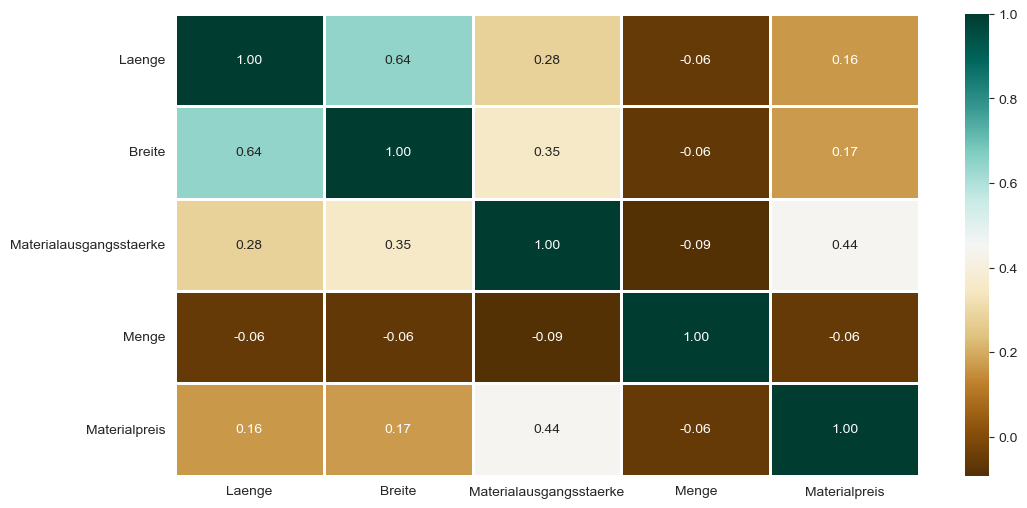

In [59]:
plt.figure(figsize=(12, 6))
sns.heatmap(X[numeric_features].corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Train & Test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print('Train set: Features: ', X_train.shape[1], '| Nbr of lines:', X_train.shape[0])
print('Test set: Features: ', X_test.shape[1], '| Nbr of lines:', X_test.shape[0])

# keep a backup of the X_test before transformations
X_test_backup = pd.merge(df_backup,
                         X_test,
                         left_index=True,
                         right_index=True,
                         suffixes=('_before_transf', '_after_transf'))

Train set: Features:  52 | Nbr of lines: 4170
Test set: Features:  52 | Nbr of lines: 736


### Machine learning models: Predicting the Lieferantpreis

For metrics: https://towardsdatascience.com/model-evaluation-in-scikit-learn-abce32ee4a99

In [61]:
def MAE(y_true, y_pred): 
    """
    Mean Absolute Error — the average of the difference between
    the actual value and the predicted one. It measures how far
    the predictions are from the actual output. The lower the MAE, the better the model.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

def plot_real_vs_predicted_data(y_test, Y_pred):
    
    # compare prediction vs real target
    pred_comp = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(Y_pred)], axis=1)
    pred_comp.columns = ['Lieferantpreis_true', 'Lieferantpreis_predicted'] 
    pred_comp['diff'] = abs(pred_comp['Lieferantpreis_true'] - pred_comp['Lieferantpreis_predicted'])
    
    plt.scatter(np.arange(pred_comp.shape[0]), pred_comp.Lieferantpreis_true, label='true')
    plt.scatter(np.arange(pred_comp.shape[0]), pred_comp.Lieferantpreis_predicted, label='predicted')
    plt.title("Predicted vs Real Lieferantpreis")
    plt.xlabel('product index in the test set')
    plt.ylabel('Lieferantpreis')
    plt.legend()
    plt.show()
    return pred_comp.sort_values('diff', ascending=False)

## 1. Linear regression

MAPE:  8041516743.666415
MAE:  7156949905.705671
MSE:  3.769934176612764e+22
R2 Score:  -1.6048055256988033e+19


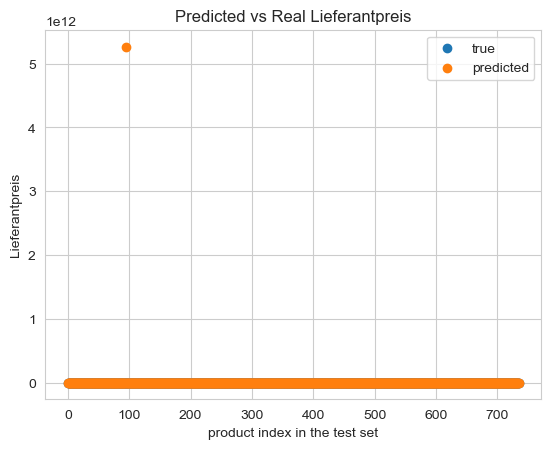

,Lieferantpreis_true,Lieferantpreis_predicted,diff
95,0.8900,5.267515e+12,5.267515e+12
139,766.7300,5.832031e+01,7.084097e+02
595,567.4400,6.503125e+01,5.024088e+02
700,567.4400,6.503125e+01,5.024088e+02
565,435.9800,1.021328e+02,3.338472e+02
...,...,...,...
277,0.0423,9.375000e-02,5.145000e-02
443,19.5700,1.960938e+01,3.937500e-02
256,1.6500,1.687500e+00,3.750000e-02
27,34.1900,3.415625e+01,3.375000e-02


In [62]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred = model_LR.predict(X_test) 
print("MAPE: ", MAPE(y_test, Y_pred)) #mean_absolute_percentage_error
print("MAE: ", MAE(y_test, Y_pred)) #mean_absolute_error
print("MSE: ", mean_squared_error(y_test, Y_pred))
print("R2 Score: ", r2_score(y_test, Y_pred))
plot_real_vs_predicted_data(y_test, Y_pred)

## 2. SVR

C:\Users\obensalem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAPE:  11.514999838601483
MAE:  14.70820213367542
MSE:  2099.212321190588
R2 Score:  0.10639619292013369


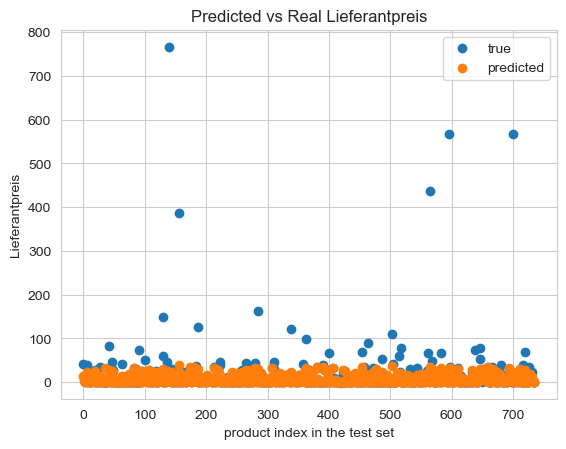

,Lieferantpreis_true,Lieferantpreis_predicted,diff
139,766.7300,21.750659,744.979341
700,567.4400,23.889766,543.550234
595,567.4400,23.889766,543.550234
565,435.9800,33.830977,402.149023
156,385.8500,38.570586,347.279414
...,...,...,...
85,0.4200,0.415834,0.004166
613,0.0910,0.087659,0.003341
274,0.0777,0.075013,0.002687
498,0.6900,0.692428,0.002428


In [63]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
print("MAPE: ", MAPE(y_test, Y_pred)) #mean_absolute_percentage_error
print("MAE: ", MAE(y_test, Y_pred)) #mean_absolute_error
print("MSE: ", mean_squared_error(y_test, Y_pred))
print("R2 Score: ", r2_score(y_test, Y_pred))
plot_real_vs_predicted_data(y_test, Y_pred)

## 3. Random Forest Regression

C:\Users\obensalem\AppData\Local\Temp\ipykernel_28560\1207294493.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train, y_train)


MAPE:  20.66543065495206
MAE:  19.82065951901235
MSE:  101.55379771566945
R2 Score:  0.9567700421029008


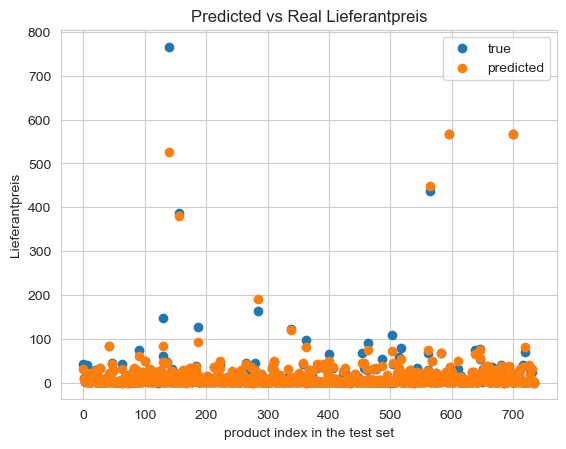

,Lieferantpreis_true,Lieferantpreis_predicted,diff
139,766.73,526.877000,239.853000
130,148.21,83.928000,64.282000
503,109.41,71.107867,38.302133
186,126.41,91.835500,34.574500
284,162.93,190.944000,28.014000
...,...,...,...
574,22.62,22.620000,0.000000
671,22.62,22.620000,0.000000
548,0.86,0.860000,0.000000
192,11.89,11.890000,0.000000


In [64]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
Y_pred = model_RFR.predict(X_test)
print("MAPE: ", MAPE(y_test, Y_pred)) #mean_absolute_percentage_error
print("MAE: ", MAE(y_test, Y_pred)) #mean_absolute_error
print("MSE: ", mean_squared_error(y_test, Y_pred))
print("R2 Score: ", r2_score(y_test, Y_pred))
plot_real_vs_predicted_data(y_test, Y_pred)

### 4. GaussianProcessRegressor

In [65]:
kernel = ConstantKernel() * RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
                               random_state=0).fit(X_train, y_train)
pred_mean, pred_std = gpr.predict(X_test, return_std=True)

C:\Users\obensalem\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [66]:
gpr.score(X_train, y_train)

0.9970989563607197

In [67]:
gpr.score(X_test, y_test)


0.9108566284123345

In [68]:
print("R2 Score: ", r2_score(y_test, pred_mean))

R2 Score:  0.9108566284123345


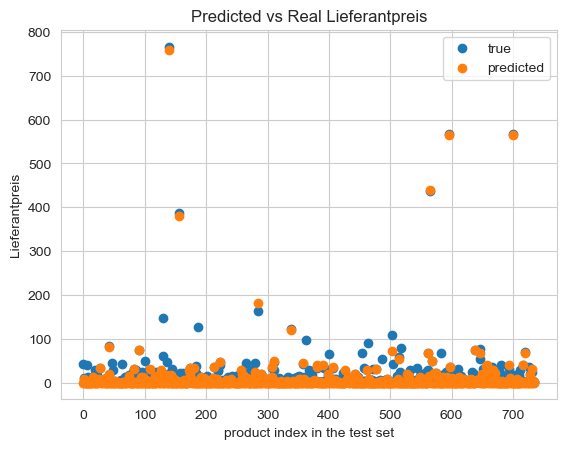

,Lieferantpreis_true,Lieferantpreis_predicted,diff
130,148.210,0.000000e+00,148.210000
186,126.410,0.000000e+00,126.410000
363,97.790,8.138006e-43,97.790000
463,89.480,0.000000e+00,89.480000
518,78.200,7.396229e-05,78.199926
...,...,...,...
461,0.263,2.625736e-01,0.000426
610,0.144,1.437277e-01,0.000272
244,0.144,1.437277e-01,0.000272
84,0.164,1.637341e-01,0.000266


In [69]:
plot_real_vs_predicted_data(y_test, pred_mean)

In [70]:
y_test.min(), y_test.max()

(Lieferantpreis    0.0259
 dtype: float64,
 Lieferantpreis    766.73
 dtype: float64)

In [71]:
pred_mean.min(), pred_mean.max()

(0.0, 758.1119346111037)

In [72]:
X_test

,abs,abs re,pc,pc re,pe,pe re,pet,pet re,pmma,pp,...,asch,jaun,kroh,schick,schmutz + Sohn,Laenge,Breite,Materialausgangsstaerke,Menge,Materialpreis
4744,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-1.448006,-1.582917,1.462462,-0.107312,1.030320
3621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.241625,0.286194,-0.424218,-0.108103,-0.469729
984,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.819527,-0.908984,-0.801554,-0.096508,-0.666221
2911,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2.073376,2.076329,-0.801554,-0.103359,-0.642258
3185,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.737461,1.175997,-0.424218,-0.092819,1.873798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.721623,-0.866863,1.462462,-0.108103,0.728393
2593,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-0.611086,-0.793152,-0.424218,-0.108103,2.472859
1497,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.358431,-0.213991,-0.801554,-0.103359,-0.718938
84,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-1.189035,-1.319662,-1.017174,0.286621,-0.651843


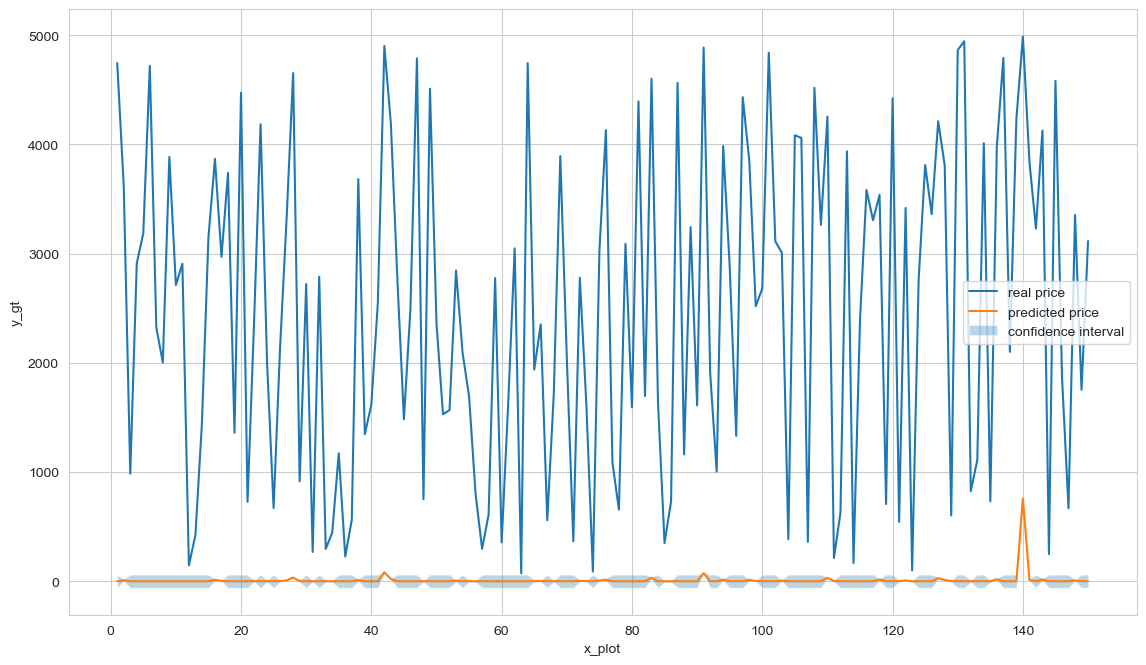

In [73]:
X_plot = np.array(range(1,X_test.shape[0]+1))

nbd_sample_plot = 150 # X_plot.shape[0] 

# initialize list of lists
data = list(np.vstack((list(X_plot[:nbd_sample_plot].T), list(y_test[:nbd_sample_plot].T),
                       list(pred_mean[:nbd_sample_plot].T),
                       list(pred_std[:nbd_sample_plot].T))).T)
  
# Create the pandas DataFrame
plot_df = pd.DataFrame(data, columns=['x_plot', 'y_gt', 'pred_mean', 'pred_std'])

fig = plt.gcf()
cm = 1/2.54  # centimeters in inches
fig.set_size_inches(35*cm, 20*cm)
sns.set_style("whitegrid")
sns.lineplot(data=plot_df,
             x="x_plot",
             y = "y_gt",
             label="real price")
sns.lineplot(data=plot_df,
             x="x_plot",
             y = "pred_mean",
             label="predicted price")
plt.fill_between(plot_df['x_plot'].values,
                 (plot_df['pred_mean'].values - plot_df['pred_std'].values),
                 (plot_df['pred_mean'].values + plot_df['pred_std'].values),
                 alpha=0.3, label="confidence interval")
plt.legend()

#fig.savefig('test2png.png', dpi=400)

In [74]:
X_test.head()

,abs,abs re,pc,pc re,pe,pe re,pet,pet re,pmma,pp,...,asch,jaun,kroh,schick,schmutz + Sohn,Laenge,Breite,Materialausgangsstaerke,Menge,Materialpreis
4744,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-1.448006,-1.582917,1.462462,-0.107312,1.030320
3621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.241625,0.286194,-0.424218,-0.108103,-0.469729
984,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.819527,-0.908984,-0.801554,-0.096508,-0.666221
2911,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2.073376,2.076329,-0.801554,-0.103359,-0.642258
3185,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.737461,1.175997,-0.424218,-0.092819,1.873798


In [75]:
fs = pd.DataFrame(X_test, columns=numeric_features+categorical_features)
fs.loc[:, y_feature] = pred_mean
sc_pred = fs.loc[:, numeric_features + [y_feature]]
sc_pred = pd.DataFrame(scaler.inverse_transform(sc_pred), columns=numeric_features+[y_feature])
sc_pred.loc[:, categorical_features] = fs.loc[:, categorical_features]
sc_pred['x_plot'] = range(1,y_test.shape[0]+1)

ValueError: operands could not be broadcast together with shapes (736,6) (5,) (736,6) 

In [ ]:
sc_pred

In [ ]:
fs = pd.DataFrame(X_test, columns=numeric_features+categorical_features)
fs.loc[:, y_feature] = pred_std
sc_pred_std = fs.loc[:, numeric_features + [y_feature]]
sc_pred_std = pd.DataFrame(scaler.inverse_transform(sc_pred_std), columns=numeric_features+[y_feature])
sc_pred_std.loc[:, categorical_features] = fs.loc[:, categorical_features]
sc_pred_std['x_plot'] = range(1,y_test.shape[0]+1)

In [ ]:
fs = pd.DataFrame(X_test, columns=numeric_features+categorical_features)
fs.loc[:, y_feature] = y_test
sc_gt = fs.loc[:, numeric_features + [y_feature]]
sc_gt = pd.DataFrame(scaler.inverse_transform(sc_gt), columns=numeric_features+[y_feature])
sc_gt.loc[:, categorical_features] = fs.loc[:, categorical_features]
sc_gt['x_plot'] = range(1,y_test.shape[0]+1)

In [ ]:
sc_gt

In [ ]:
fig = plt.gcf()
cm = 1/2.54  # centimeters in inches
fig.set_size_inches(35*cm, 20*cm)
sns.set_style("whitegrid")
sns.lineplot(data=sc_gt[:150],x='x_plot', y = y_feature,label="real price")
sns.lineplot(data=sc_pred[:150], x="x_plot", y = y_feature,label="predicted price")
plt.fill_between(sc_pred['x_plot'].values[:150], (sc_pred[y_feature].values[:150] - sc_pred_std[y_feature].values[:150]), (sc_pred[y_feature].values[:150] + sc_pred_std[y_feature].values[:150]), alpha=0.3, label="confidence interval")
plt.legend()

In [ ]:
getcontext().prec = 7

In [ ]:
deviation_percentage = (sc_pred['Lieferantpreis'].values-sc_gt['Lieferantpreis'].values)/sc_gt['Lieferantpreis'].values

In [ ]:
deviation_percentage = deviation_percentage*100

In [ ]:
deviation_percentage.max()


In [ ]:

negative_data = deviation_percentage.copy()
negative_data[negative_data>0] = 0
positive_data = deviation_percentage.copy()
positive_data[positive_data<0] = 0

fig = plt.gcf()
cm = 1/2.54  # centimeters in inches
fig.set_size_inches(70*cm, 30*cm)
ax = plt.subplot(111)
ax.bar(sc_pred['x_plot'].values, negative_data, width=1, color='r')
ax.bar(sc_pred['x_plot'].values, positive_data, width=1, color='b')
plt.ylim([-500, 500])
plt.xlim([0, 200])

In [ ]:
sc_gt['Lieferantpreis_pred'] = sc_pred['Lieferantpreis'].values
sc_gt['Lieferantpreis_pred_deviation'] = deviation_percentage

In [ ]:
sc_gt

In [ ]:

sc_gt.to_excel(r'mydata.xlsx')

In [ ]:
df